In [439]:
import pandas as pd
import numpy as np
from sklearn import tree
import pydotplus 
import graphviz
from IPython.display import Image
from graphviz import Source
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Part One - German Credit Data

## Build a decision tree model and evaluate the model using:

In [440]:
data = pd.read_csv('german.data-numeric', sep='\s+', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,17,1,4,2,4,1,31,...,0,0,1,0,0,1,0,1,0,1
996,1,30,2,39,1,3,1,4,2,40,...,0,1,1,0,0,1,0,0,0,1
997,4,12,2,8,1,5,3,4,3,38,...,0,0,1,0,0,1,0,0,1,1
998,1,45,2,18,1,3,3,4,4,23,...,0,0,1,0,0,0,0,0,1,2


In [441]:
data.columns = np.arange(25).astype(str)

In [442]:
data.columns = [*data.columns[:-1], 'class']

In [443]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,class
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


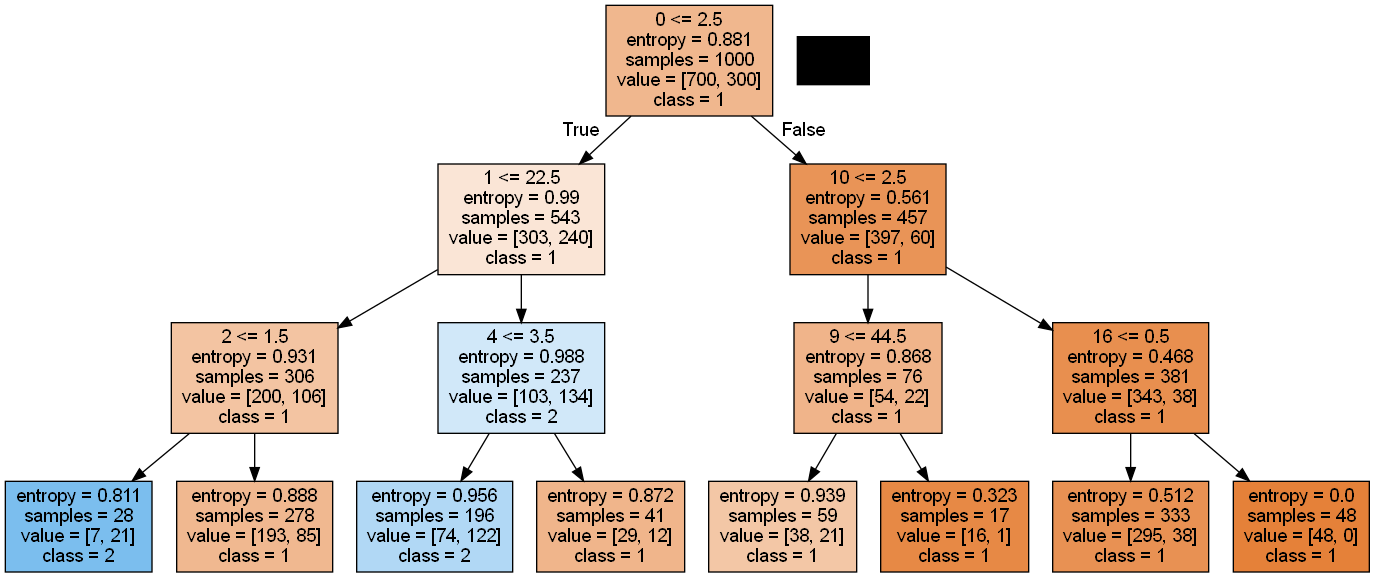

In [444]:
Y = data['class']               
X = data.drop(['class'], axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X, Y)

# visualize tree 
dot_data = tree.export_graphviz(clf, feature_names=X.columns, 
                                class_names=['1','2'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

## *Function to plot bars*

In [445]:
def plot_bars(func, n, width, colours, holdout):
    index = np.arange(n)

    # bar 1 for accuracy
    accuracy_bar = func.iloc[0]
    bar1 = plt.bar(index, accuracy_bar, width, color=colours[0],edgecolor='snow')

    # bar 2 for precision
    precisicon_bar = func.iloc[1]
    bar2 = plt.bar(index+width, precisicon_bar, width, color=colours[1],edgecolor='snow')

    # bar 3 for f-measure
    f_measure_bar = func.iloc[2]
    bar3 = plt.bar(index+width*2, f_measure_bar, width, color=colours[2], edgecolor='snow')

    plt.xticks(index+width, func.columns)

    plt.legend((bar1, bar2, bar3), 
               ('Accuracy', 'Precision', 'F-Measure'), 
               loc='center right')
    
    if (holdout):
        plt.xlabel('Trial Number')
        plt.ylabel('Score')
        plt.title('Holdout Performance')
    else:
        plt.xlabel('Folds')
        plt.ylabel('Score')
        plt.title('10-fold Cross-validation Performance')
    
    # average accuracy, precision, and f-measure lines
    plt.axhline(func.iloc[0,-1], alpha=0.9, linestyle='dotted', color=colours[0]) 
    plt.axhline(func.iloc[1,-1], alpha=0.9, linestyle='dotted', color=colours[1]) 
    plt.axhline(func.iloc[2,-1], alpha=0.9, linestyle='dotted', color=colours[2])
    
    plt.show()

## 1. Holdout

In [446]:
def holdout(df, impurity, split_size, depth, test_train, avg):
    # build the model
    Y = df['class']                # target
    X = df.drop(['class'], axis=1) # features

    # split data into % train and % test 
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=split_size) 

    # train decision tree classifier
    clf = tree.DecisionTreeClassifier(criterion=impurity, max_depth=depth)
    clf = clf.fit(X_train, y_train)
    #print(X_train.shape, y_train.shape)

    # for part three - predict train and test
    if test_train == 'train':
        # predict the testing data on the training data
        y_pred = clf.predict(X_train)
        # results
        acc_score = accuracy_score(y_train, y_pred)
        prec_score = precision_score(y_train, y_pred, average=avg)
        f_score = f1_score(y_train, y_pred, average=avg)
    else:
        y_pred = clf.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        prec_score = precision_score(y_test, y_pred, average=avg)
        f_score = f1_score(y_test, y_pred, average=avg)
                               
    return acc_score, prec_score, f_score

In [447]:
def holdout_iter(df, impurity, split_size, depth, 
                 trials, test_train, avg):
    acc = []
    prec = []
    fm = []
    
    # call holdout n times
    for i in range(trials):
        results = holdout(df, impurity, split_size, depth, 
                          test_train, avg)
        acc.append(results[0])
        prec.append(results[1])
        fm.append(results[2])
    
    # get final average
    acc_mean = np.mean(acc)
    prec_mean = np.mean(prec)
    f_mean = np.mean(fm)

    acc.append(acc_mean)
    prec.append(prec_mean)
    fm.append(f_mean)
    
    table = pd.DataFrame([acc, prec, fm], 
                          index=['Accuracy', 'Precision', 'F-Measure'],
                          columns=None)
    table.columns = [*table.columns[:-1], 'Average']
    
    return table

Perform 5 times...

In [448]:
# ***function params***
# data file = data, impurity measure = gini, 
# train/test split % = 0.1, tree depth = 3, 
# num. of trials = 5, average = binary
german_gini_hold = holdout_iter(data, 'gini', 0.1, 3, 5, 'test', 'binary')
german_gini_hold.round(3)

,0,1,2,3,4,Average
Accuracy,0.760,0.720,0.790,0.720,0.610,0.720
Precision,0.795,0.810,0.870,0.773,0.648,0.779
F-Measure,0.829,0.821,0.865,0.806,0.745,0.813


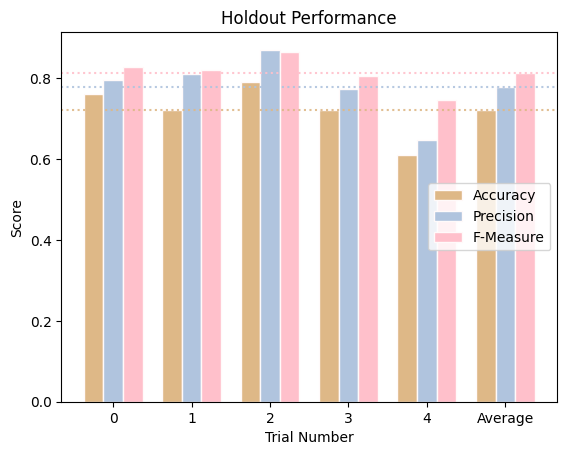

In [449]:
pastel = ['burlywood','lightsteelblue','pink']
# function, index range (num. cols), bar width, colors, 
# holdout plot = true / cross-validation plot = false
plot_bars(german_gini_hold, 6, 0.25, pastel, True)

Figure 1: Gini Holdout
- The average accuracy is ideal and the precision and f-measure generally remain above average for each iteration.

## 2. Cross-validation

In [450]:
def cross_validation(df, impurity, weighted):
    Y_train = df['class']                
    X_train = df.drop(['class'], axis=1)
    clf = tree.DecisionTreeClassifier(criterion=impurity)
    clf = clf.fit(X_train, Y_train)
    
    if (weighted):
        print('Weighted')
        a = cross_val_score(clf, X_train, Y_train, cv=10, scoring='accuracy')
        p = cross_val_score(clf, X_train, Y_train, cv=10, scoring='precision_weighted')
        f = cross_val_score(clf, X_train, Y_train, cv=10, scoring='f1_weighted')
    else:
        print('!Weighted')
        a = cross_val_score(clf, X_train, Y_train, cv=10, scoring='accuracy')
        p = cross_val_score(clf, X_train, Y_train, cv=10, scoring='precision')
        f = cross_val_score(clf, X_train, Y_train, cv=10, scoring='f1') 
   
    aa = np.mean(a)
    pp = np.mean(p)
    ff = np.mean(f)
    
    accuracy = np.append(a, aa)
    precision = np.append(p, pp)
    f_measure = np.append(f, ff)

    list = [accuracy, precision, f_measure]
    table = pd.DataFrame(list, 
                          index=['Accuracy', 'Precision', 'F-Measure'],
                          columns=None)
    table.columns = [*table.columns[:-1], 'Average']
   
    return table

In [451]:
german_gini_cross = cross_validation(data, 'gini', False)
german_gini_cross.round(3)

!Weighted


,0,1,2,3,4,5,6,7,8,9,Average
Accuracy,0.670,0.640,0.730,0.630,0.680,0.710,0.740,0.710,0.670,0.710,0.689
Precision,0.787,0.776,0.785,0.742,0.766,0.750,0.838,0.815,0.794,0.779,0.783
F-Measure,0.791,0.707,0.797,0.741,0.745,0.824,0.800,0.770,0.786,0.806,0.777


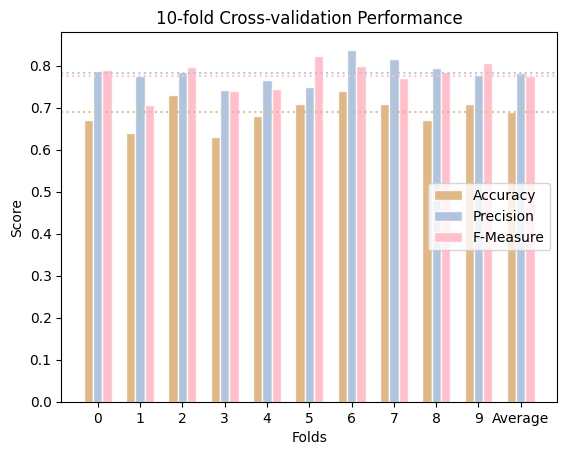

In [452]:
plot_bars(german_gini_cross, 11, 0.22, pastel, False)

Figure 2: Gini Cross-validation
- The average accuracy is lower than the holdout method. The precision is close to the average half the time, and the f-measure is below average around 4/10 folds.

# Part Two - German Credit Data

## 1. Select the Entropy as the impurity measure and repeat Part I 

## Holdout

In [453]:
german_entropy_hold = holdout_iter(data, 'entropy', 0.1, 3,  5, 'test', 'binary')
german_entropy_hold.round(3)

,0,1,2,3,4,Average
Accuracy,0.680,0.800,0.790,0.840,0.700,0.762
Precision,0.740,0.833,0.795,0.867,0.697,0.787
F-Measure,0.781,0.875,0.863,0.900,0.821,0.848


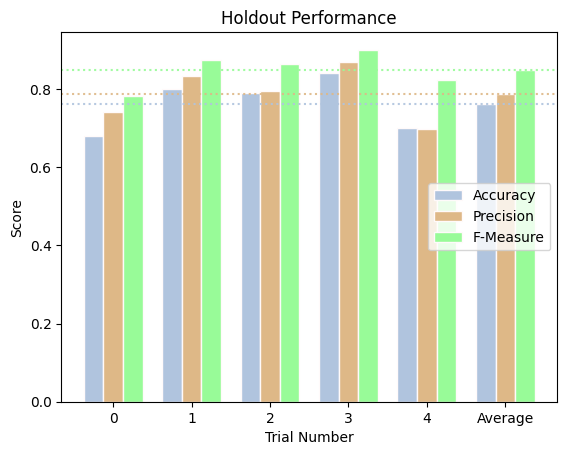

In [454]:
pastel2 = ['lightsteelblue','burlywood','palegreen']
plot_bars(german_entropy_hold, 6, 0.25, pastel2, True)

Figure 3: Entropy Holdout
- The f-measure across all trials is greater than the accuracy and precision. Each metric is below its average 2/5 trials (40% of the time).

## Cross-validation

In [455]:
german_entropy_cross = cross_validation(data, 'entropy', False)
german_entropy_cross.round(3)

!Weighted


,0,1,2,3,4,5,6,7,8,9,Average
Accuracy,0.680,0.610,0.710,0.660,0.630,0.680,0.690,0.740,0.730,0.720,0.685
Precision,0.761,0.767,0.809,0.746,0.768,0.753,0.771,0.812,0.779,0.773,0.774
F-Measure,0.770,0.682,0.814,0.755,0.763,0.776,0.779,0.794,0.816,0.822,0.777


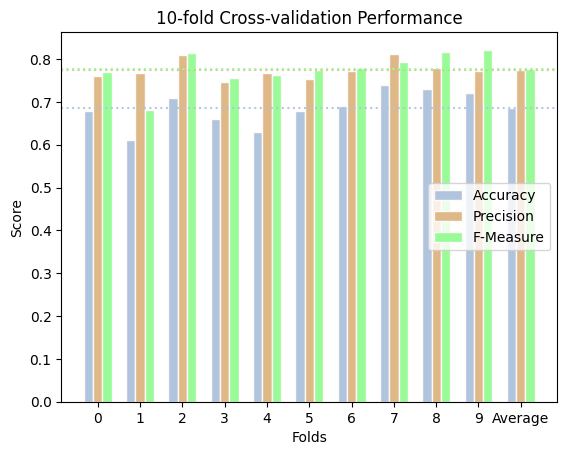

In [456]:
plot_bars(german_entropy_cross, 11, 0.22, pastel2, False)

Figure 4: Entropy Cross-validation
- The accuracy is less than its average approximately 50% of the time (5/10 folds below average), the average precision and f-measure is nearly the same and below average at least 40-50% of the time.

## 2. Compare the final Accuracy of cross-validation of Part I and II using some figures 

In [457]:
def plot_bars_accuracy(func1, func2):
    index = np.arange(11)
    width = 0.3

    # cross-validation accuracy row 
    # from part 1 using GINI
    cv_acc1 = func1.iloc[0] # entropy
    bar1 = plt.bar(index, cv_acc1, width, color='lightsteelblue', edgecolor='snow')

    # cross-validation accuracy row 
    # from part 2 using ENTROPY
    cv_acc2 = func2.iloc[0] 
    bar2 = plt.bar(index+width, cv_acc2, width, color='burlywood', edgecolor='snow')

    plt.xticks(index+width, func1.columns)

    plt.legend((bar1, bar2), 
               ('Gini', 'Entropy'), 
               loc='center right')

    plt.xlabel('Folds')
    plt.ylabel('Score')
    plt.title('Accuracy of 10-fold Cross-validation')
    
    plt.axhline(func1.iloc[0,-1], alpha=0.9, linestyle='dotted', color='lightsteelblue') 
    plt.axhline(func2.iloc[0,-1], alpha=0.9, linestyle='dotted', color='burlywood') 
    
    plt.show()

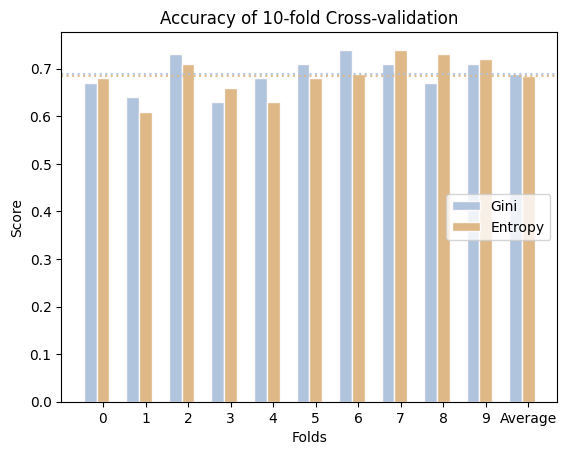

In [458]:
plot_bars_accuracy(german_gini_cross, german_entropy_cross)

Figure 5: Accuracy scores of each Cross-validation fold using Gini and Entropy.
- Gini has a slightly higher accuracy average compared to Entropy. Entropy and Gini is below average 5/10 folds.

In [461]:
def plot_bars_avg_accuracy(func1, func2):
    gini = func1.iloc[0]['Average'] # gini cross-validation
    entropy = func2.iloc[0]['Average'] # entropy cross validation

    fig, ax  = plt.subplots()
    final = ax.bar([1, 2], [gini, entropy], width=0.8,
               tick_label=['Gini', 'Entropy'], align='center', 
               color=['lightsteelblue','slategray'])
    ax.bar_label(final)

    plt.title('Average Accuracy of Cross-validation')
    plt.ylabel('Accuracy')

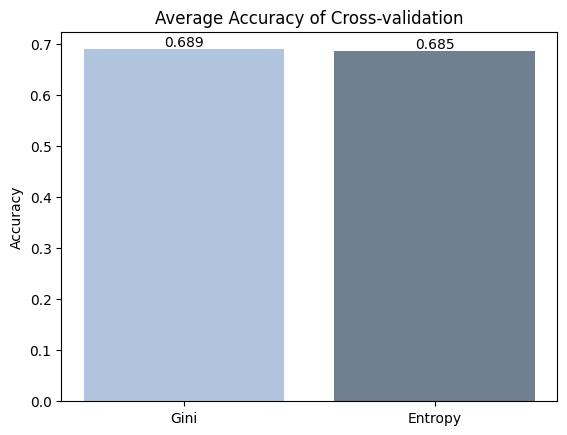

In [462]:
plot_bars_avg_accuracy(german_gini_cross, german_entropy_cross)

Fgiure 6: Average accuracy of cross-validation using gini and entropy.
- The average accuracy for both impurity measures is relatively the same, with Gini slightly higher in this run (previous function calls had entropy > gini at a negligible amount).

# Part Three - German Credit Data

## Investigate the effect of tree depth on the accuracy of the model 

In [463]:
# access avg value
german_entropy_hold.iloc[0,-1]

0.7619999999999999

In [464]:
max_depths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

def tree_depth_iter(df, avg):
    train_acc = []
    test_acc = []

    for depth in max_depths:
        Y_predTrain = holdout_iter(df, 'gini', 0.1, depth, 5, 'train', avg).iloc[0, -1]
        Y_predTest = holdout_iter(df, 'gini', 0.1, depth, 5, 'test', avg).iloc[0, -1]
        train_acc.append(Y_predTrain)
        test_acc.append(Y_predTest)
    
    plt.plot(max_depths, train_acc, 'ro-', max_depths, test_acc, 'bv--')
    plt.legend(['Training Accuracy','Test Accuracy'])
    plt.xlabel('Max depth')
    plt.ylabel('Accuracy')

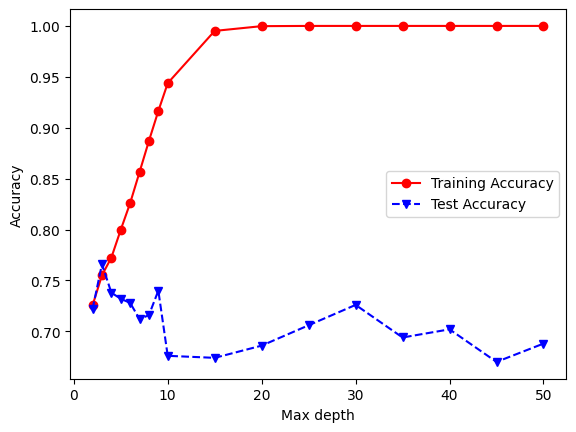

In [465]:
tree_depth_iter(data, 'binary')

Figure 6: Test vs Train accuracy of Holdout using Gini
- The training accuracy increases with the tree depth. The test accuracy improves at a depth of approximately 3-4, and decreases due to overfitting.

# Part One - Waveform Database Generator

## Build a decision tree model and evaluate the model using:

In [466]:
data2 = pd.read_csv('waveform.data', header=None)
data2

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.65,0.69,2.29,-0.16,0.51,0.26,2.34,-0.42,0.49,0.31,...,3.46,4.81,5.49,5.19,3.10,3.86,2.96,1.09,-1.42,0
4996,-0.02,0.67,2.34,3.18,2.16,4.77,6.70,4.54,4.92,3.39,...,1.53,2.52,1.14,-1.56,-1.18,-0.56,0.02,-1.05,-0.18,1
4997,0.01,-1.99,0.16,2.30,-0.53,1.93,3.61,3.00,4.61,5.73,...,3.14,3.04,1.61,0.60,-0.52,0.62,1.00,1.21,-0.27,1
4998,-0.40,0.41,-0.48,1.04,0.79,-0.66,1.18,0.52,2.20,0.59,...,3.64,3.62,5.97,2.63,3.83,1.72,2.08,1.31,1.37,0


In [467]:
data2.columns = np.arange(22).astype(str)

In [468]:
data2.columns = [*data2.columns[:-1], 'class']

In [469]:
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,class
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1


In [470]:
data2['class'].unique()

array([2, 1, 0], dtype=int64)

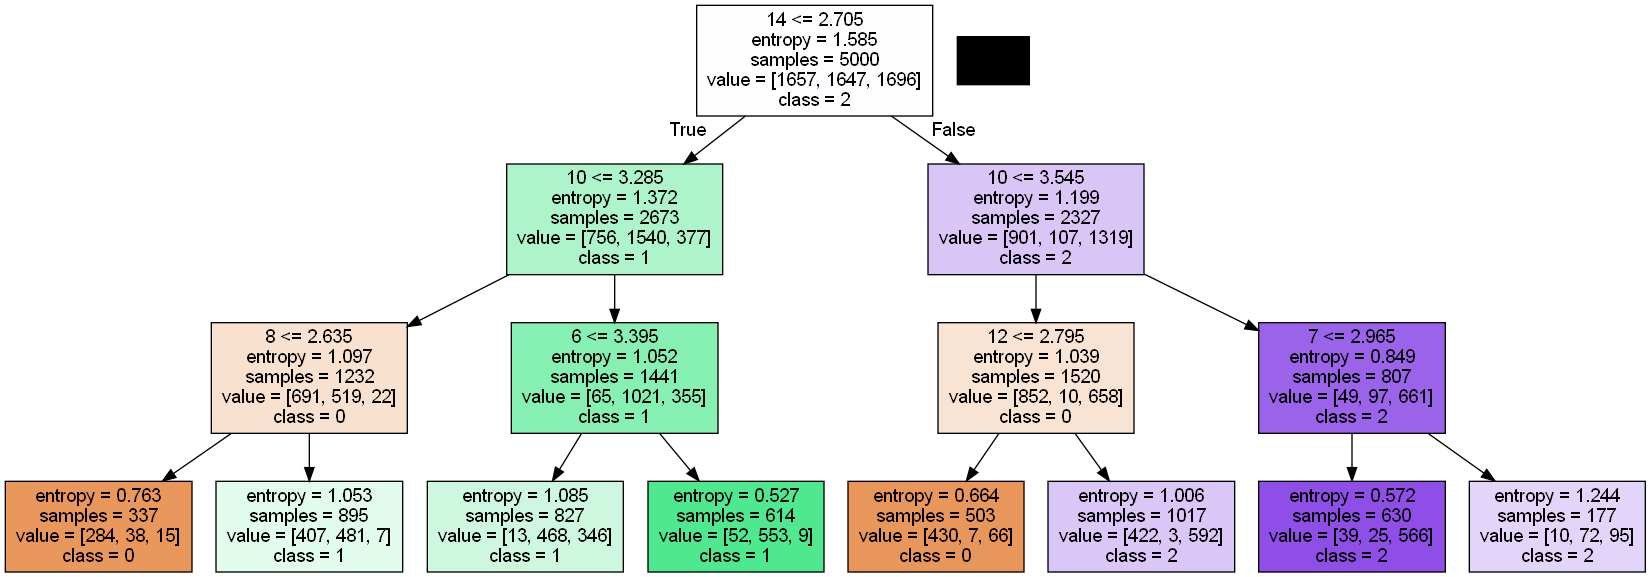

In [471]:
Y = data2['class']               
X = data2.drop(['class'], axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X, Y)

# visualize tree 
dot_data = tree.export_graphviz(clf, feature_names=X.columns, 
                                class_names=['0','1','2'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

## 1. Holdout

In [474]:
# data file, impurity measure, train/test %, tree depth, 5 trials, classify test or test, weight
wave_gini_hold = holdout_iter(data2, 'gini', 0.1, 3,  5, 'test', 'weighted')
wave_gini_hold.round(3)

,0,1,2,3,4,Average
Accuracy,0.724,0.700,0.704,0.742,0.746,0.723
Precision,0.747,0.720,0.713,0.755,0.755,0.738
F-Measure,0.711,0.693,0.694,0.735,0.743,0.715


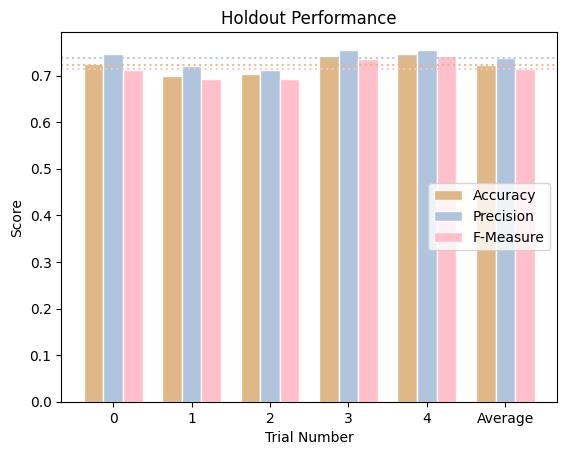

In [475]:
plot_bars(wave_gini_hold, 6, 0.25, pastel, True)

Figure 7: Gini Holdout
- The weighted precision and f-measure yields average results that are consistent among each trial. In this case, the f-measure is lower than that of the former binary dataset.

## 2. Cross-validation

In [476]:
wave_gini_cross = cross_validation(data2, 'gini', True)
wave_gini_cross.round(3)

Weighted


,0,1,2,3,4,5,6,7,8,9,Average
Accuracy,0.778,0.788,0.768,0.752,0.764,0.750,0.744,0.762,0.752,0.778,0.764
Precision,0.785,0.773,0.754,0.752,0.762,0.753,0.754,0.760,0.754,0.761,0.761
F-Measure,0.786,0.784,0.780,0.752,0.768,0.745,0.738,0.767,0.742,0.780,0.764


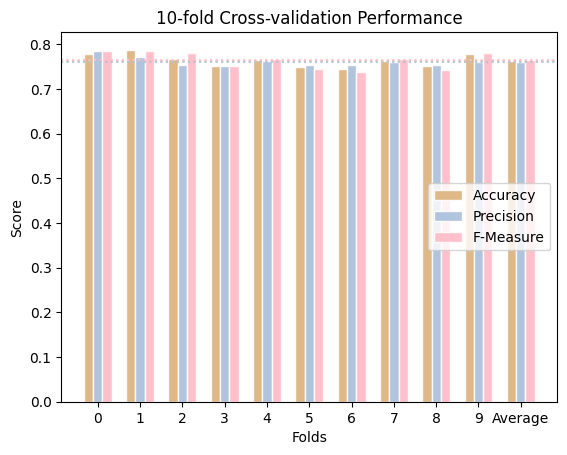

In [477]:
plot_bars(wave_gini_cross, 11, 0.22, pastel, False)

Figure 8: Gini Cross-validation
- Again, we can see that most of the metrics across each fold have similar results that does not deviate from the average much.

# Part Two - Waveform Database Generator

## 1. Select the Entropy as the impurity measure and repeat Part I

## Holdout

In [478]:
wave_entropy_hold = holdout_iter(data2, 'entropy', 0.1, 3, 5, 'test', 'weighted')
wave_entropy_hold.round(3)

,0,1,2,3,4,Average
Accuracy,0.690,0.676,0.688,0.726,0.650,0.686
Precision,0.714,0.697,0.726,0.730,0.674,0.708
F-Measure,0.680,0.663,0.678,0.726,0.632,0.676


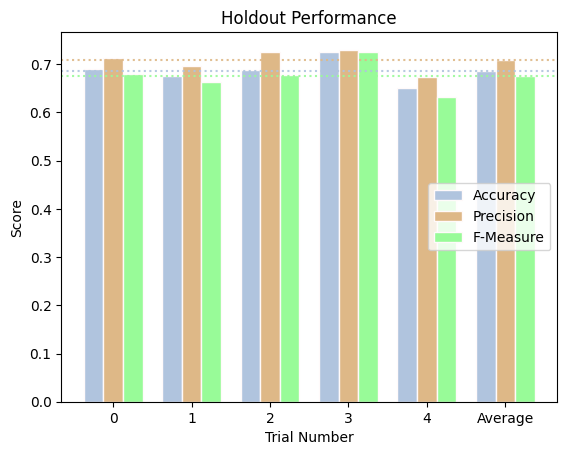

In [479]:
plot_bars(wave_entropy_hold, 6, 0.25, pastel2, True)

Figure 9: Entropy Holdout
- The precision is above average/at 3/5 (60%) of the trials, the accuracy is above average 2/5 (40%) of the trials, and the f-measure is above/at average 40% of the trials.

## Cross-validation

In [480]:
wave_entropy_cross = cross_validation(data2, 'entropy', True)
wave_entropy_cross.round(3)

Weighted


,0,1,2,3,4,5,6,7,8,9,Average
Accuracy,0.782,0.718,0.758,0.768,0.780,0.720,0.754,0.760,0.750,0.738,0.753
Precision,0.788,0.714,0.766,0.766,0.784,0.730,0.764,0.752,0.754,0.754,0.757
F-Measure,0.794,0.746,0.763,0.766,0.774,0.719,0.770,0.748,0.741,0.750,0.757


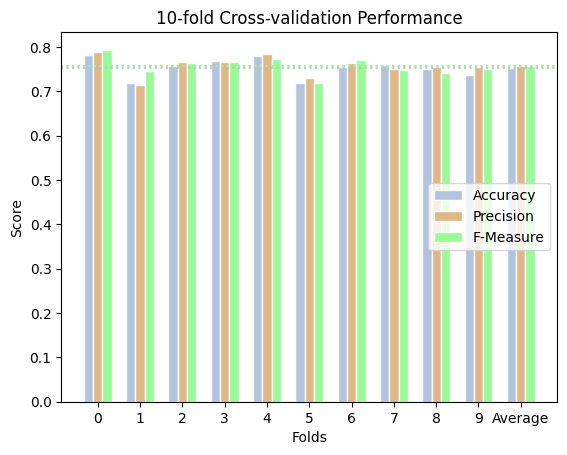

In [481]:
plot_bars(wave_entropy_cross, 11, 0.22, pastel2, False)

Figure 10: Entropy Cross-validation
- The metrics are consistently close the average in each fold, and all metrics have nearly the same average of around 75%.

## 2. Compare the final Accuracy of cross-validation of Part I and II using some figures

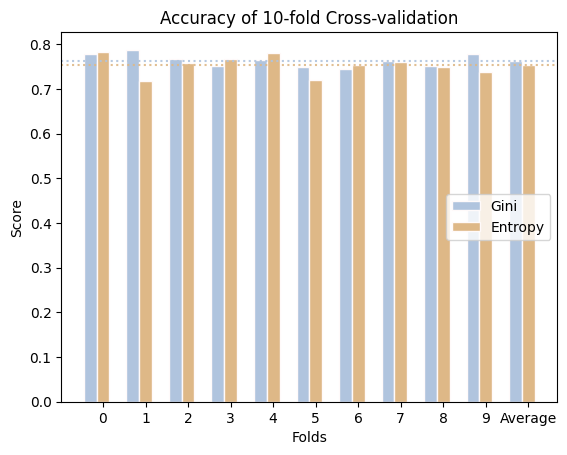

In [482]:
plot_bars_accuracy(wave_gini_cross, wave_entropy_cross)

Figure 11: Accuracy of Cross-validation for Gini and Entropy
- In this case, Gini has the greater average accuracy (although the difference is not significant), the average accuarcies for the multiclass weighted data has a greater difference than that seen in the binary data. 

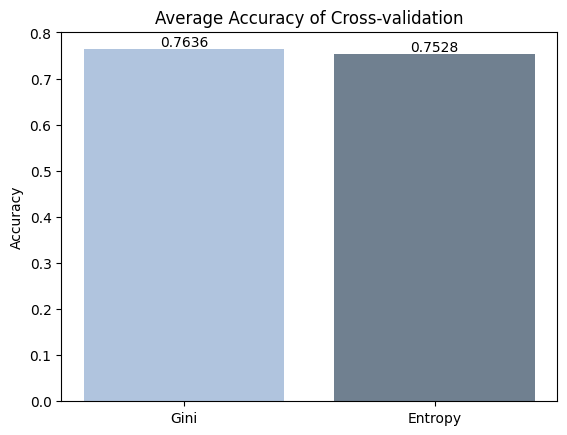

In [484]:
plot_bars_avg_accuracy(wave_gini_cross, wave_entropy_cross)

Figure 12: Average accuracy of Cross-validation for Gini and Entropy
- Gini has a slighter higher average accuracy than Entropy

# Part Three - Waveform Database Generator

## Investigate the effect of tree depth on the accuracy of the model

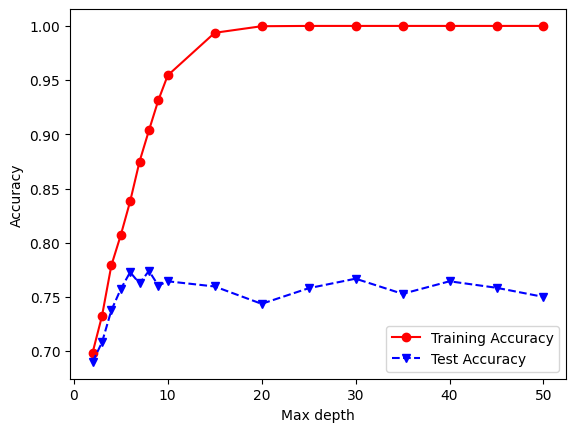

In [485]:
max_depths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

tree_depth_iter(data2, 'weighted')

Figure 13: Test vs Train accuracy of Holdout using Gini
- Again, we can see that the training data steadily increases its accuracy as the tree depth increases because the model becomes more complex. The test accuracy peaks around 7-8, and slowly decreases due to the overfitting problem.